### Read data and compute $Q^2$ & $R_g^2$

We have performed different simulations over different number of conformations, $T$, and we want to compute all its mean squared end-to-end distances and radius of gyration, for finally studying its relative error and see when it converges with the ideal values of $T \xrightarrow{} \infty$.

In [3]:
# Library for reading simulation data
import numpy as np

# Parameters
b=3.0
N=100
T_list=[10, 100, 1000, 10000, 100000]

# Lists for saving the mean squared values of Q2 and R2 in function of N
Q2_list = []
R2_list = []
# and its theoretical values
Q2_theory_list = []
R2_theory_list = []

# Loop over N
for T in T_list:
    # Coordinates arrays
    x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

    # Read simulation data
    filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
    with open(filename,'r') as f:
        for t in range(T):
            # First 2 lines unnecessary
            lines = f.readline()
            lines = f.readline()
            # Save coordinates and separate in x, y, z
            for i in range(N+1):
                lines = f.readline()
                x[t,i]=float(lines.split()[1])
                y[t,i]=float(lines.split()[2])
                z[t,i]=float(lines.split()[3])

    # Compute and plot end-to-end distance and radius of gyration
    Q=np.zeros((T,3))
    R=np.zeros((T,3))
    for t in range(T):
        Q[t,0]=x[t,N]-x[t,0]
        Q[t,1]=y[t,N]-y[t,0]
        Q[t,2]=z[t,N]-z[t,0]
        R[t,0]=np.sum((x[t,:]-np.mean(x[t,:]))**2)
        R[t,1]=np.sum((y[t,:]-np.mean(y[t,:]))**2)
        R[t,2]=np.sum((z[t,:]-np.mean(z[t,:]))**2)
    Q=np.sqrt(np.sum(Q**2,axis=1))
    R=np.sqrt(np.sum(R,axis=1)/N)

    # Compute the mean squared value
    Q2=np.mean(Q**2)
    R2=np.mean(R**2)
    Q2_list.append(Q2)
    R2_list.append(R2)

    # Theoretical values
    Q2_theory=b**2 * N
    R2_theory=b**2 * N/6
    Q2_theory_list.append(Q2_theory)
    R2_theory_list.append(R2_theory)

print('Q2 =', Q2_list)
print('R2 =', R2_list)
print('Q2_theory =', Q2_theory_list)
print('R2_theory =', R2_theory_list)


Q2 = [513.7279824, 963.9970358, 841.840009232, 882.9856532023, 899.8175157966098]
R2 = [139.99208109164357, 152.05204358475842, 147.81431686531306, 151.88574080250496, 152.7113967371323]
Q2_theory = [900.0, 900.0, 900.0, 900.0, 900.0]
R2_theory = [150.0, 150.0, 150.0, 150.0, 150.0]


## Relative error study
Remember that the relative error of a quantity $x$ is
$$\langle x \rangle = \frac{|x - x^{th}|}{x^{th}}$$

**For the report you just have to show $Q^2$.**

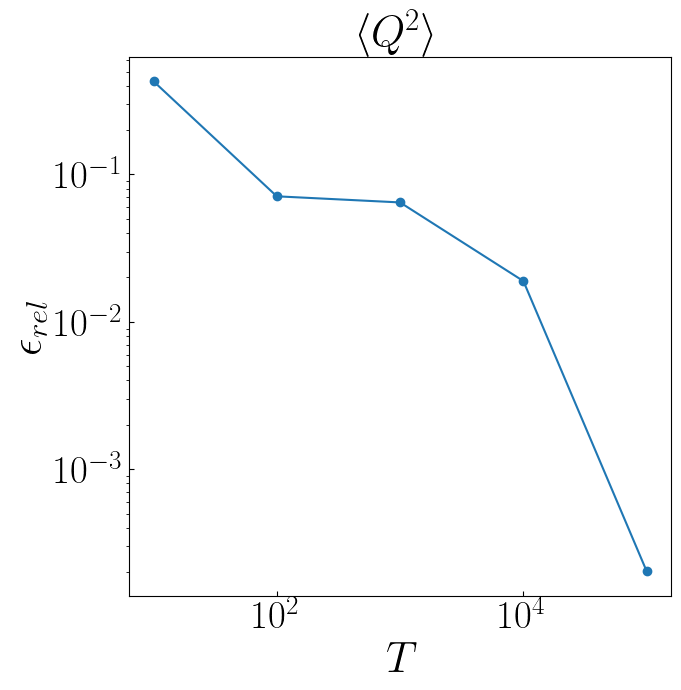

In [6]:
# Necessary library for plotting
import matplotlib.pyplot as plt

# LaTeX compiler
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Pass to numpy arrays
Q2_list=np.array(Q2_list)
R2_list=np.array(R2_list)
Q2_theory_list=np.array(Q2_theory_list)
R2_theory_list=np.array(R2_theory_list)

# Compute relative error
Q2_error=np.abs(Q2_list-Q2_theory_list)/Q2_theory_list
R2_error=np.abs(R2_list-R2_theory_list)/R2_theory_list

# Plot relative error in log-log scale
plt.figure(figsize=(7,7))
plt.loglog(T_list,Q2_error,'o-')
plt.xlabel(r'$T$',fontsize=32)
plt.ylabel(r'$\epsilon_{rel}$',fontsize=32)
plt.title(r'$\langle Q^2 \rangle$',fontsize=32)
plt.tick_params(axis='y', which='major', labelsize=28, direction='in')
plt.tick_params(axis='x', which='major', labelsize=28, direction='in')
plt.show()

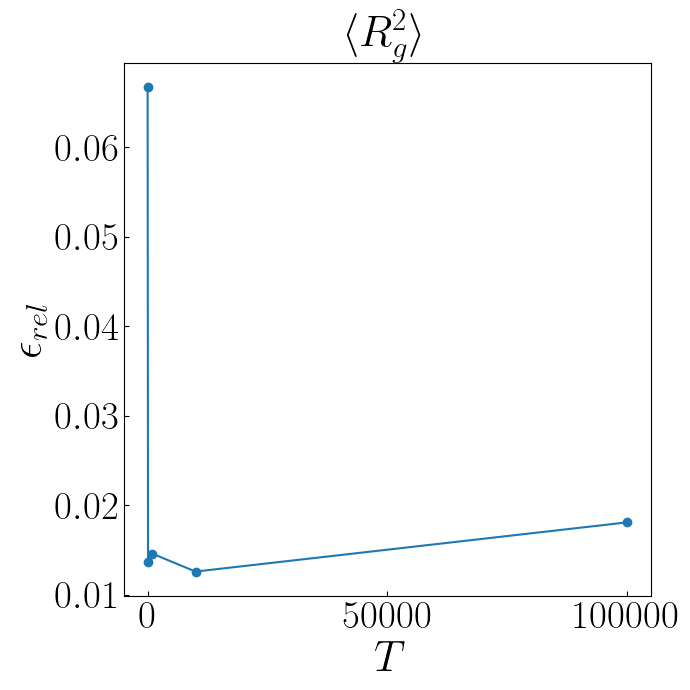

In [7]:
plt.figure(figsize=(7,7))
plt.plot(T_list,R2_error,'o-')
plt.xlabel(r'$T$',fontsize=32)
plt.ylabel(r'$\epsilon_{rel}$',fontsize=32)
plt.title(r'$\langle R^2_g \rangle$',fontsize=32)
#plt.ylim(0,0.06)
plt.tick_params(axis='y', which='major', labelsize=28, direction='in')
plt.tick_params(axis='x', which='major', labelsize=28, direction='in')
plt.tight_layout()
plt.show()